In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks
from numpy.fft import fft, ifft

Prominent frequencies for theta_k =  0.82  are  [0.01, 0.03, 0.152, 0.169, 0.17200000000000001]
Time periods for theta_k =  0.82  are  [100.          33.33333333   6.57894737   5.91715976   5.81395349]
Prominent Peak values for theta_k =  0.82  are  [19.939389013616854, 13.658118024048434, 20.363169999084878, 15.662481571588955, 17.307636796132375]


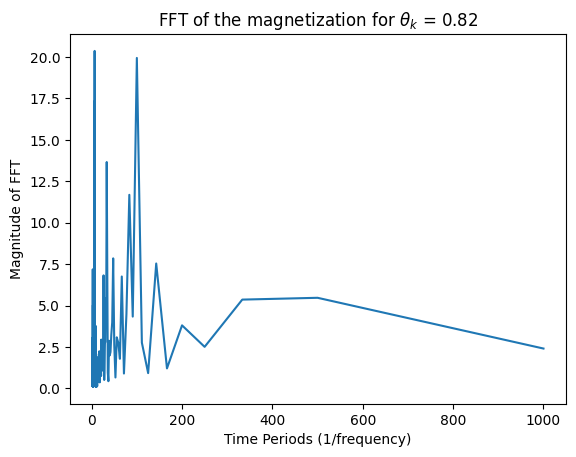

Prominent frequencies for theta_k =  0.65  are  [0.012, 0.022, 0.025, 0.133, 0.135]
Time periods for theta_k =  0.65  are  [83.33333333 45.45454545 40.          7.51879699  7.40740741]
Prominent Peak values for theta_k =  0.65  are  [14.5159945496312, 12.973822176140422, 17.656609680074293, 17.40289565741982, 14.475693399132965]


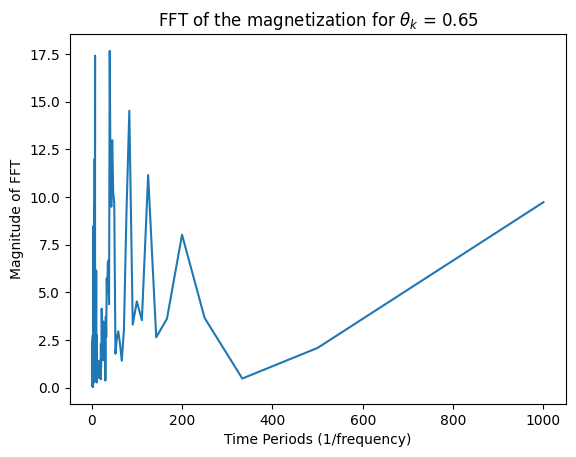

Prominent frequencies for theta_k =  0.62  are  [0.008, 0.021, 0.024, 0.129, 0.131, 0.133]
Time periods for theta_k =  0.62  are  [125.          47.61904762  41.66666667   7.75193798   7.63358779
   7.51879699]
Prominent Peak values for theta_k =  0.62  are  [13.142985827544326, 15.471133840054021, 17.52759086148381, 18.27503131224983, 12.597580458658513, 12.738509466919744]


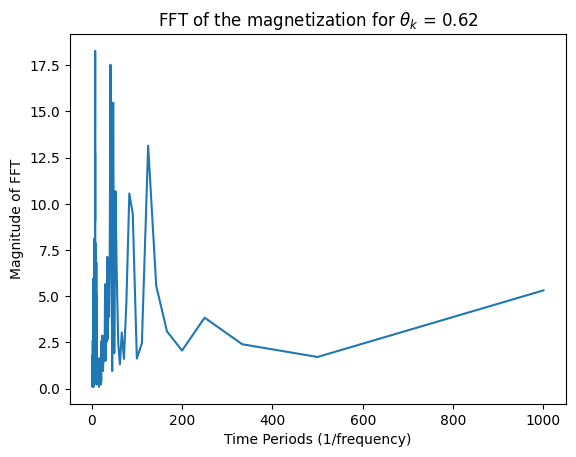

Prominent frequencies for theta_k =  0.55  are  [0.008, 0.016, 0.022, 0.116, 0.12, 0.176]
Time periods for theta_k =  0.55  are  [125.          62.5         45.45454545   8.62068966   8.33333333
   5.68181818]
Prominent Peak values for theta_k =  0.55  are  [16.305190127498356, 36.01697887606704, 20.903450314560327, 22.402405639674473, 30.9295125051296, 14.121298804296378]


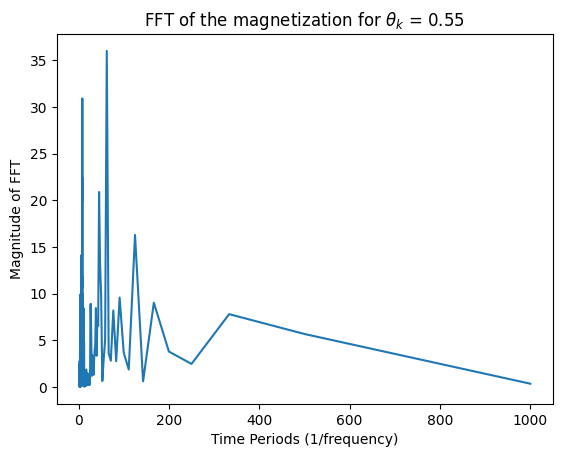

Prominent frequencies for theta_k =  0.52  are  [0.006, 0.009000000000000001, 0.013000000000000001, 0.015, 0.021, 0.025, 0.111, 0.114, 0.116]
Time periods for theta_k =  0.52  are  [166.66666667 111.11111111  76.92307692  66.66666667  47.61904762
  40.           9.00900901   8.77192982   8.62068966]
Prominent Peak values for theta_k =  0.52  are  [12.538683474288051, 12.265013906823324, 12.346529546843533, 27.012639763958738, 17.135148652844304, 13.01849468253315, 19.747575575261106, 12.583339961824443, 18.013405941184324]


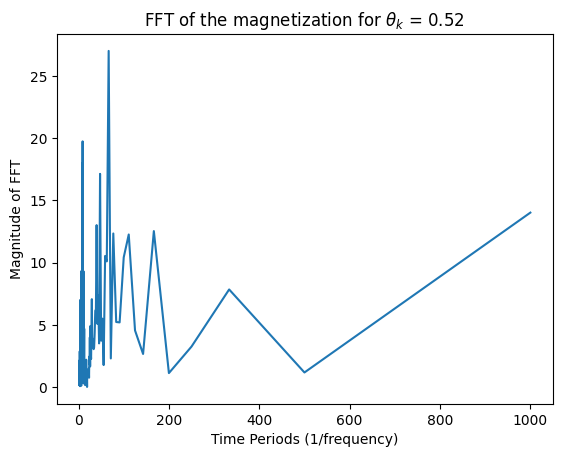

Prominent frequencies for theta_k =  0.45  are  [0.01, 0.019, 0.084, 0.08700000000000001, 0.1, 0.105]
Time periods for theta_k =  0.45  are  [100.          52.63157895  11.9047619   11.49425287  10.
   9.52380952]
Prominent Peak values for theta_k =  0.45  are  [30.515990738247705, 18.63665383815421, 23.267831888646338, 12.641443180160786, 22.7084040798369, 39.37550648467648]


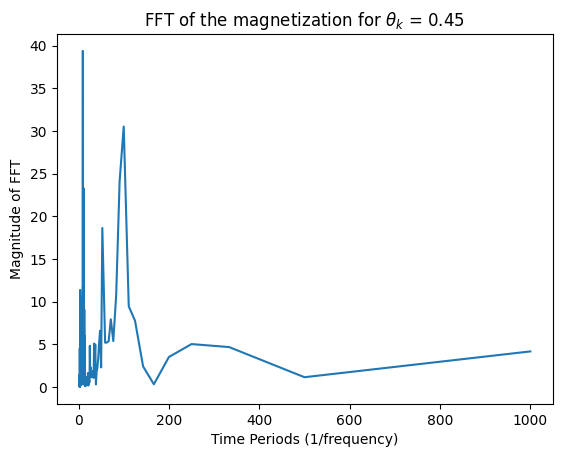

Prominent frequencies for theta_k =  0.42  are  [0.009000000000000001, 0.018000000000000002, 0.08, 0.083, 0.096, 0.101, 0.187]
Time periods for theta_k =  0.42  are  [111.11111111  55.55555556  12.5         12.04819277  10.41666667
   9.9009901    5.34759358]
Prominent Peak values for theta_k =  0.42  are  [32.66960959592951, 19.549451394059826, 21.07526181102325, 18.206927444928922, 15.20697088930938, 34.203028691283805, 13.417815495052745]


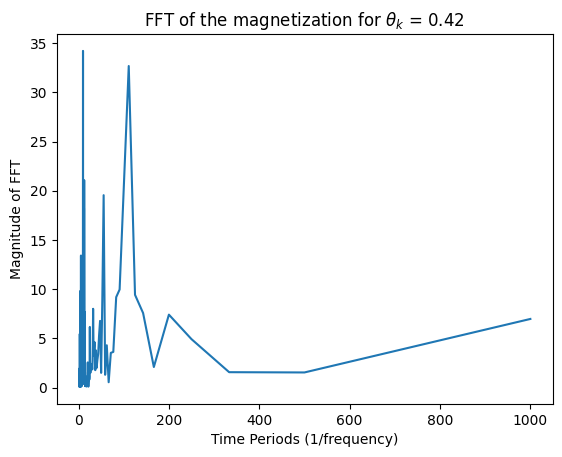

In [2]:
N = 6
theta= 1.07 #pass the true values here
theta_k_list = [0.82, 0.65, 0.62, 0.55,0.52, 0.45, 0.42]
max_trotter_steps = 1000

#i = 0

sz_vals = [0]*max_trotter_steps 
sz_vals2 = [0]*max_trotter_steps
sz_vals3 = [0]*max_trotter_steps
sz_vals4 = [0]*max_trotter_steps
sz_vals5 = [0]*max_trotter_steps

"""for i in range(max_trotter_steps):
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals[i] = data[1]
    data = np.loadtxt(f"scaled_codes/data/N = {N}, theta = {theta}, theta_k = {theta_k}, t = {i}_sz.txt")
    sz_vals4[i] = data[1]



for i in range(max_trotter_steps):
    data3 = np.loadtxt(f"scaled_codes/data/N = 8, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_TS.txt")
    sz_vals3[i] = data3[1]"""
for theta_k in theta_k_list:
    for i in range(max_trotter_steps):
        data2 = np.loadtxt(f"../scaled_codes/data2/N = 6, theta = {theta}, theta_k = {theta_k}, t = {i}_sz_tol.txt")
        sz_vals2[i] = data2[1]  

        #FFT to find out the frequency of the oscillations
    fft1 = fft(sz_vals2)
        #find list of frequencies

    freqs = np.fft.fftfreq(len(sz_vals2))
        #find the peaks
    peaks, _ = find_peaks(np.abs(fft1))
    peaks = peaks[freqs[peaks] > 0]

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks
    #print(freqs[peaks]) #print the frequencies with magnitude above 10

    #print the frequencies with magnitude above 10
    prom_freqs = [freqs[i] for i in peaks if np.abs(fft1[i]) > 12]

    time_periods = 1/np.abs(prom_freqs)

    #print("Peaks for theta_k = ",theta_k," are ",peaks) #print the peaks

    print("Prominent frequencies for theta_k = ",theta_k," are ",prom_freqs) #print the prominent frequencies
    print("Time periods for theta_k = ",theta_k," are ",time_periods) #print the time periods

    peak_vals = [np.abs(fft1[i]) for i in peaks if np.abs(fft1[i]) > 12] #find the prominent peak values

    print("Prominent Peak values for theta_k = ",theta_k," are ",peak_vals) #print the peak values

    #Plot only the positive frequencies and the magnitudes at those frequencies

    freqs_pos = freqs[freqs > 0]
    time_periods_1 = 1/freqs_pos
    fft1_pos = fft1[freqs > 0]

    plt.plot(time_periods_1,np.abs(fft1_pos))
    plt.xlabel("Time Periods (1/frequency)")
    plt.ylabel("Magnitude of FFT")
    plt.title(r"FFT of the magnetization for $\theta_k$ = " + str(theta_k))
    plt.show()


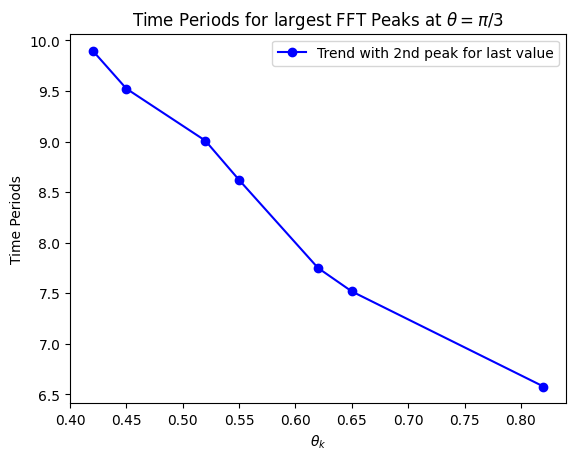

In [3]:
timeperiod_list = [100,83.333,125,62.5,111.11111111,100,111.11111111]
timeperiod_list_2 = [6.578,7.518,7.75,8.62,9.009,9.523,9.90]

#plt.plot(theta_k_list,timeperiod_list,'r',label = "Anomalous with max peaks")
plt.plot(theta_k_list,timeperiod_list_2,'bo-',label = "Trend with 2nd peak for last value")
plt.xlabel(r"$\theta_k$")
plt.ylabel("Time Periods")
plt.legend()
plt.title("Time Periods for largest FFT Peaks at " + r"$\theta = \pi/3$")
plt.show()